## Energy Consumption and Prediction Project

### Step1: Data Explorations

##### Importing Libraries

In [4]:
import pandas as pd
import numpy as anp

### Reading Dataset
##### The file 'hpc.txt' is read with a semicolon (;) separator
##### hpc = household_power_consumption

In [5]:
df = pd.read_csv('hpc.txt',sep=";")

C:\Users\peeth\AppData\Local\Temp\ipykernel_12076\4060873768.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hpc.txt',sep=";")


### Understanding Structure of Dataset
#### Display the first few rows of the dataset

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Observation
##### It displayed first 5 rows

####  Display the last few rows to check if the data is consistent

In [7]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Observation
##### It displayed last 5 rows

#### 'describe()' gives a statistical summary for numerical columns: count, mean, min, max, std deviation

In [8]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


#### This returns the number of rows and columns

In [9]:
df.shape

(2075259, 9)

### Observation
##### Dataset has 9 Colums and 2075259 Rows

#### 'describe(include=object)' gives information about non-numeric columns, such as counts, unique values,top and frequencies

In [10]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


### Observation 
##### There are some unique values and missing values

#### 'nunique()' returns the number of unique values in each column

In [11]:
df.nunique()

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

#### 'info()' provides details about column names, data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Obserbation
##### The dataset consists of multiple columns, including both numerical and object types

##### To get accurate Null values , first we have to convert columns which are in string to numericals

##### Combined 'Date' and 'Time' columns to create a new 'Datetime' column

#### I combined date and time colums because - 

#####      Use time-based indexing to easily filter or retrieve data from a specific time range

######     Calculate time intervals between different records

In [13]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

##### Columns that represent numerical values but stored as strings are converted using 'to_numeric'
##### 'errors=coerce' converts non-convertible values to NaN

In [14]:
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


### Observation
##### All Datatypes changed to float and datetime colums create with datetime datatype

### Checking for null values
#### 'isnull().any()' checks if there are any null values

In [16]:
df.isnull().any()

Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
Datetime                 False
dtype: bool

### Observation
##### We have null values in every colums except datetime column

#### Calculate the percentage of null values in each column
##### This helps assess how much data is missing

In [17]:
(df.isnull().sum() / len(df)) * 100

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
Datetime                 0.000000
dtype: float64

### Observation 
##### Every column missing 1.25% of data

##### We can deal with null values by fill missing values with the mean , 

##### median of the column or delete row which have null values

##### I am filling the mean of the column

In [17]:
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean(), inplace=True)

#### Recheck for null values after handling

In [18]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

### Observation 
##### There are no null values

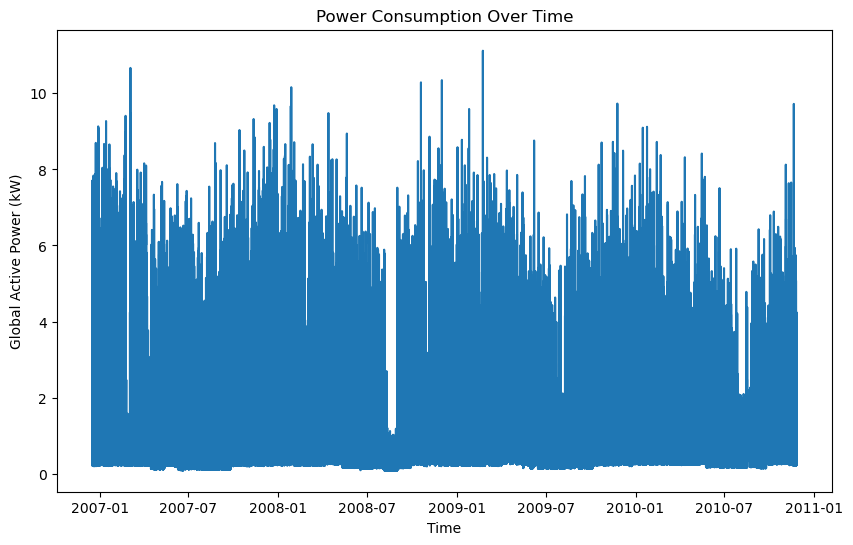

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.plot(df['Datetime'], df['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Power Consumption Over Time')
plt.show()